In [16]:
import numpy as np 

import os 

import PIL 

import PIL.Image 

import tensorflow as tf 

In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17388258863392280183
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5723127808
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17098825364498893873
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:09:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
tf. config. list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [38]:
batch_size = 32

img_height = 256
img_width = 256

In [39]:
C:\\Users\\CornDatasetv2

SyntaxError: unexpected character after line continuation character (3564739953.py, line 1)

In [40]:
train_ds = tf.keras.utils.image_dataset_from_directory( 

  "C:\\Users\\CornDatasetv2", 

  validation_split=0.2, 

  subset="training", 

  seed=123, 

  image_size=(img_height, img_width), 

  batch_size=batch_size) 

Found 25643 files belonging to 3 classes.
Using 20515 files for training.


In [41]:
val_ds = tf.keras.utils.image_dataset_from_directory( 

  "C:\\Users\\CornDatasetv2", 

  validation_split=0.2, 

  subset="validation", 

  seed=123, 

  image_size=(img_height, img_width), 

  batch_size=batch_size) 
input_shape = (img_height, img_width ,batch_size)

Found 25643 files belonging to 3 classes.
Using 5128 files for validation.


In [7]:
class_names = train_ds.class_names 

print(class_names) 

['Blight', 'Rust', 'healthy']


In [8]:
import matplotlib.pyplot as plt 

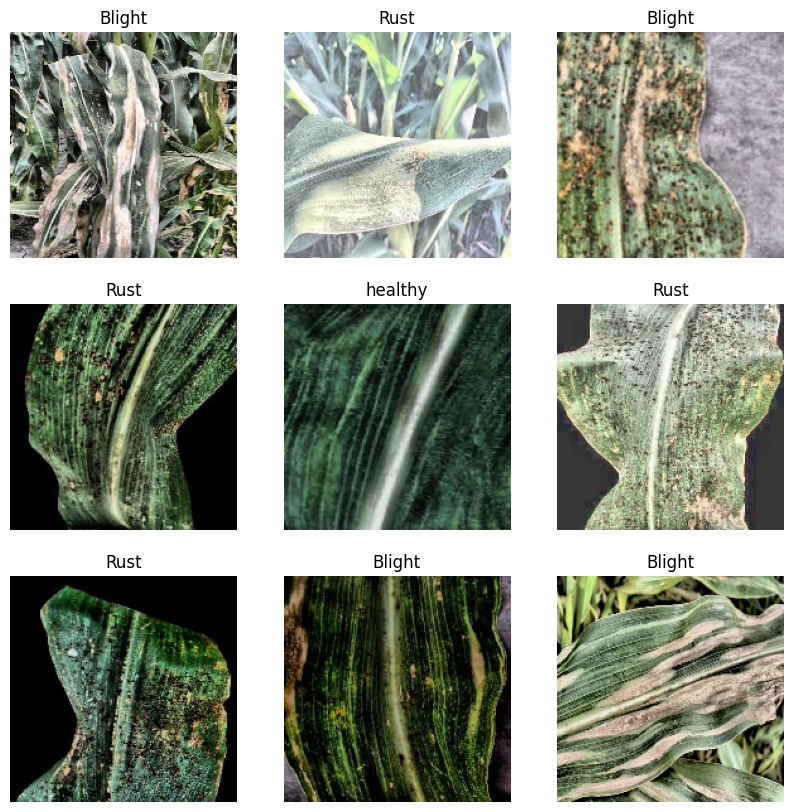

In [9]:
plt.figure(figsize=(10, 10)) 

for images, labels in train_ds.take(1): 

  for i in range(9): 

    ax = plt.subplot(3, 3, i + 1) 

    plt.imshow(images[i].numpy().astype("uint8")) 

    plt.title(class_names[labels[i]]) 

    plt.axis("off") 

In [10]:
for image_batch, labels_batch in train_ds: 

  print(image_batch.shape) 

  print(labels_batch.shape) 

  break 

(32, 180, 180, 3)
(32,)


In [11]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(10, input_shape = (None,32,32,3))

In [13]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation

In [32]:
class CustomDense(tf.keras.layers.Layer):
    def __init__(self, num_units, activation="relu"):
        super(CustomDense, self).__init__()

        self.num_units = num_units
        self.activation = Activation(activation)

    def build(self, input_shape):
        
        self.weight = self.add_weight(shape=[input_shape[-1], self.num_units])
        self.bias = self.add_weight(shape=[self.num_units])

    def call(self, input):
        y = tf.matmul(input, self.weight) + self.bias
        y = self.activation(y)
        return y

In [33]:
modelv1 = tf.keras.models.Sequential([
        Flatten(input_shape=(32,32,3)),
        CustomDense(1, activation="relu"),
        
        CustomDense(10, activation="relu"),
    
        Dropout(0.01),
        CustomDense(10, activation="softmax"),
        CustomDense(1, activation="relu")
    ])
     

In [34]:
modelv2 = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="selu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="selu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="selu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation="selu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="selu"),
     tf.keras.layers.Dense(4)
    ]
)

In [46]:
mainmodel = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation='relu',padding='same', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, activation='relu',padding='same', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])




In [70]:
from keras import regularizers
modelv3 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0000001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu',padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0000001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu',padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0000001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu',padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.0000001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [71]:
modelv4 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu',padding='same', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu',padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu',padding='same', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [47]:
mainmodel.compile( 

  optimizer='adagrad', 

  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 

  metrics=['accuracy']) 

In [73]:
import os

In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [75]:
mainmodel.fit( 

  train_ds, 

  validation_data=val_ds, 

  epochs=250,

  verbose=1

) 

Epoch 1/250


C:\Anaconda\envs\tf\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


642/642 [==============================] - 14s 20ms/step - loss: 0.8919 - accuracy: 0.6514 - val_loss: 0.4952 - val_accuracy: 0.8701
Epoch 2/250
642/642 [==============================] - 13s 20ms/step - loss: 0.5917 - accuracy: 0.8044 - val_loss: 0.3501 - val_accuracy: 0.9093
Epoch 3/250
642/642 [==============================] - 13s 20ms/step - loss: 0.4948 - accuracy: 0.8467 - val_loss: 0.3113 - val_accuracy: 0.9245
Epoch 4/250
642/642 [==============================] - 13s 20ms/step - loss: 0.4504 - accuracy: 0.8708 - val_loss: 0.2815 - val_accuracy: 0.9306
Epoch 5/250
642/642 [==============================] - 13s 20ms/step - loss: 0.4192 - accuracy: 0.8791 - val_loss: 0.2528 - val_accuracy: 0.9384
Epoch 6/250
642/642 [==============================] - 13s 20ms/step - loss: 0.3841 - accuracy: 0.8932 - val_loss: 0.2460 - val_accuracy: 0.9364
Epoch 7/250
642/642 [==============================] - 13s 20ms/step - loss: 0.3671 - accuracy: 0.8999 - val_loss: 0.2195 - val_accuracy: 0.94

KeyboardInterrupt: 

In [33]:
model.save('tf model')

NameError: name 'model' is not defined

In [29]:
del model

In [30]:
model=load_model('tf model')

In [31]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [32]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\KAVINP~1\AppData\Local\Temp\tmp4ln4csf1\assets


INFO:tensorflow:Assets written to: C:\Users\KAVINP~1\AppData\Local\Temp\tmp4ln4csf1\assets


In [8]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

NameError: name 'TF_LITE_MODEL_FILE_NAME' is not defined

In [41]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

NameError: name 'TF_LITE_MODEL_FILE_NAME' is not defined

In [42]:
model.evaluate(val_ds)

NameError: name 'model' is not defined

161/161 [==============================] - 3s 15ms/step
[[1770    0    0]
 [1777    0    0]
 [1580    1    0]]


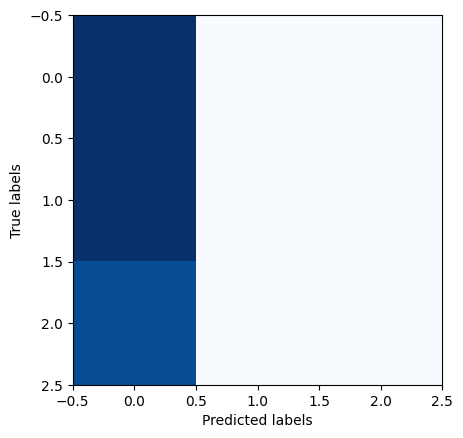

NameError: name 'cm_df' is not defined

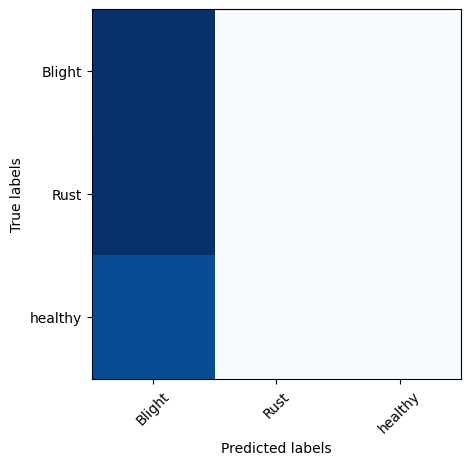

In [48]:
predictions = mainmodel.predict(val_ds)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

# 2. Convert predicted probabilities to class labels:
predictions_classes = tf.argmax(predictions, axis=1)

# 3. Get true labels from the validation set:
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())  # Collect labels for all batches

# 4. Create the confusion matrix:
cm = confusion_matrix(y_true=true_labels, y_pred=predictions_classes)

# 5. Print or visualize the confusion matrix:
print(cm)

# Optional: Visualize the matrix
import matplotlib.pyplot as plt
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

import matplotlib.pyplot as plt

# ... your code to create the confusion matrix 'cm' ...

# Display class names on the x and y labels
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=range(len(class_names)), labels=class_names)
sns.heatmap(cm_df, annot=False, cmap='Blues', fmt='g', cbar=True)
plt.show()


In [24]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Specify the path to the data directory
data_path = "C:\ScienceFairBoard\data"

# Load train, validation, and test CSV files
train_df = pd.read_csv(os.path.join(data_path, 'train', '_classes.csv'))
valid_df = pd.read_csv(os.path.join(data_path, 'valid', '_classes.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test', '_classes.csv'))

# Construct full file paths for images
train_df['full_image_path'] = os.path.join(data_path, 'train', train_df['filename'].astype(str))
valid_df['full_image_path'] = os.path.join(data_path, 'valid', valid_df['filename'].astype(str))
test_df['full_image_path'] = os.path.join(data_path, 'test', test_df['filename'].astype(str))

# Extract features and labels
X_train = train_df['full_image_path']
y_train = train_df[['class1', 'class2', 'class3']]

X_valid = valid_df['full_image_path']
y_valid = valid_df[['class1', 'class2', 'class3']]

X_test = test_df['full_image_path']
y_test = test_df[['class1', 'class2', 'class3']]

# Preprocess the data if necessary (e.g., load images, resize, extract features)

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the model
# Note: You may need to adapt this step based on the nature of your features
# For example, if you're working with image data, you might need to extract features first
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = svm_model.predict(X_valid)

# Evaluate the model on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
report_valid = classification_report(y_valid, y_pred_valid)

print(f"Validation Accuracy: {accuracy_valid}")
print("Validation Classification Report:\n", report_valid)

# Make predictions on the test set
y_pred_test = svm_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print("Test Classification Report:\n", report_test)


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'Series'

In [12]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [13]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [25]:
training_set = train_datagen.flow_from_directory('C:\\ScienceFairBoard\\data\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\ScienceFairBoard\\data\\valid',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [1]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\Kavin Prabhakar\project


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.9.15 torch-2.1.2+cpu CPU (AMD Ryzen 7 5800X 8-Core Processor)
Setup complete  (16 CPUs, 31.9 GB RAM, 515.9/930.9 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\Kavin Prabhakar\project\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 45.0ms
Speed: 2.0ms preprocess, 45.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


In [5]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4715,  625.0756, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]])

In [6]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846])

In [7]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

[WinError 2] The system cannot find the file specified: 'C:\\Users\\Kavin Prabhakar\\project/datasets'
C:\Users\Kavin Prabhakar\project


The syntax of the command is incorrect.


In [9]:
dataset = "C:\ScienceFairBoard\datav2"

In [22]:

!yolo task=classify mode=train model=yolov8s.pt data={dataset}/data.yaml epochs=100 imgsz=800 plots=True device = 'cpu' verbose = True

^C


In [19]:
import torch
torch.cuda.is_available()

False

In [3]:

import pandas as pd 
import os 
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [8]:
Categories=['Blight','Rust', 'Healthy'] 
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir='C:\\Users\\CornDatasetv2'

for i in Categories: 

    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)


loading... category : Blight
loaded category:Blight successfully
loading... category : Rust
loaded category:Rust successfully
loading... category : Healthy
loaded category:Healthy successfully


In [9]:
#dataframe 
df=pd.DataFrame(flat_data) 
df['Target']=target 
df.shape


(25643, 67501)

In [10]:
#input data 
x=df.iloc[:,:-1] 
#output data 
y=df.iloc[:,-1]


In [11]:
# Splitting the data into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
											random_state=77, 
											stratify=y) 


In [12]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
			'gamma':[0.0001,0.001,0.1,1], 
			'kernel':['rbf','poly']} 

# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)


In [ ]:
# Training the model using the training data 
model.fit(x_train,y_train)


In [ ]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Blight', 'Rust', 'Healthy']))


In [14]:
CHANNELS = 3

In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [34]:
input_shape = (256, 256, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [35]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 30, 30, 64)      

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [44]:
model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50


TypeError: 'NoneType' object is not callable